In [2]:
# !pip3 install pydot
# !pip3 install PyDTMC
from pydtmc import MarkovChain
from pydtmc import plot_graph
from pydtmc import plot_eigenvalues
from pydtmc import plot_walk

import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
# Read text
# Build markov chain
# Start random walk of x given steps in markov chain starting from given word.
# !pip3 install graphviz

In [1]:
text = 'this is a sample tweet and I want everyone to know that from now onwards my tweets will be generator on my behalf by my algorthm'

In [20]:
p = [[0.2, 0.7, 0.0, 0.1], [0.0, 0.6, 0.3, 0.1], [0.0, 0.0, 1.0, 0.0], [0.5, 0.0, 0.5, 0.0]]
mc = MarkovChain(p, ['A', 'B', 'C', 'D'])
print(mc)


DISCRETE-TIME MARKOV CHAIN
 SIZE:           4
 RANK:           4
 CLASSES:        2
  > RECURRENT:   1
  > TRANSIENT:   1
 ERGODIC:        NO
  > APERIODIC:   YES
  > IRREDUCIBLE: NO
 ABSORBING:      YES
 REGULAR:        NO
 REVERSIBLE:     NO
 SYMMETRIC:      NO



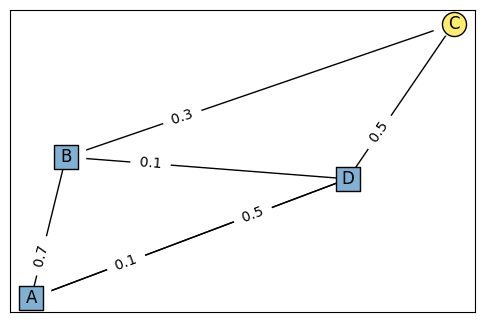

In [21]:
plot_graph(mc)

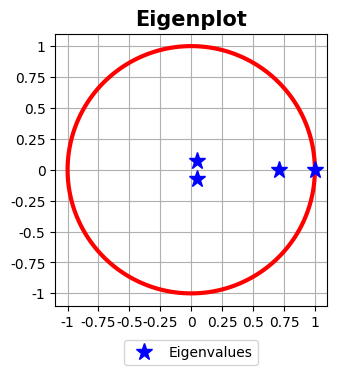

In [22]:
plot_eigenvalues(mc)

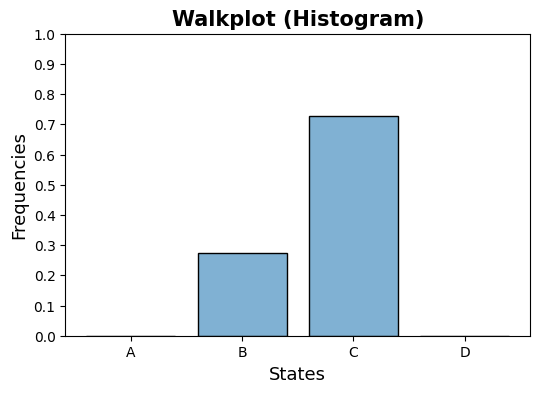

In [31]:
plot_walk(mc, 10, 'B')

In [96]:
# help(mc)

In [105]:
mc.walk(5)

['B', 'B', 'B', 'B', 'D']

In [4]:
#the following code takes a list such as
#[1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]
#with states labeled as successive integers starting with 0
#and returns a transition matrix, M,
#where M[i][j] is the probability of transitioning from i to j

def transition_matrix(transitions):
    n = 1+ max(transitions) #number of states

    M = [[0]*n for _ in range(n)]

    for (i,j) in zip(transitions,transitions[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

#test:

t = [1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]
m = transition_matrix(t)


In [46]:
x = {'A':1, 'B':2}
x.values()

dict_values([1, 2])

In [49]:
import numpy as np

def get_encoding(words): 
    vocabulary_sorted = sorted(np.unique(words))
    rank = 0
    vocabulary_code = {}
    for word in vocabulary_sorted:
        vocabulary_code[word] = rank
        rank+=1
    return vocabulary_code

# function to return key for any value

def _get_key(val, my_dict):
    for key, value in my_dict.items():
         if val == value:
            return key
    return "key not found"

def encode(words, vocabulary_code):
    return list(map(lambda w: vocabulary_code.get(w), words))

def decode(codes, encoding):
    return list(map(lambda w: _get_key(w, encoding), codes))

text = 'hi this is ahsan is'
words = text.split()
encoding = get_encoding(words)
words_encoded = encode(words, encoding)
print(words_encoded)

print(decode(words_encoded, encoding))

[1, 3, 2, 0, 2]
['hi', 'this', 'is', 'ahsan', 'is']


In [12]:
help(np.sort)

Help on function sort in module numpy:

sort(a, axis=-1, kind=None, order=None)
    Return a sorted copy of an array.
    
    Parameters
    ----------
    a : array_like
        Array to be sorted.
    axis : int or None, optional
        Axis along which to sort. If None, the array is flattened before
        sorting. The default is -1, which sorts along the last axis.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
        Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
        and 'mergesort' use timsort or radix sort under the covers and, in general,
        the actual implementation will vary with data type. The 'mergesort' option
        is retained for backwards compatibility.
    
        .. versionchanged:: 1.15.0.
           The 'stable' option was added.
    
    order : str or list of str, optional
        When `a` is an array with fields defined, this argument specifies
        which fields to compare first, second, etc.  A si